# Cell Segmentation Analysis
This notebook performs cell segmentation on the provided microscopy image using the watershed algorithm. 

## Step 1: Load the Image
We begin by loading the image from the specified path.

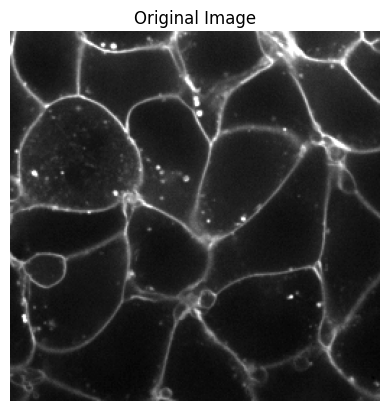

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io

# Load the image
image = io.imread('../data/membrane2d.png', as_gray=True)

# Display the image
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.show()

## Step 2: Background Removal
Apply a white top-hat filter to remove background and enhance the foreground.

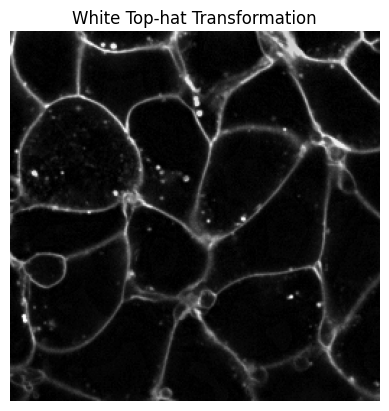

In [2]:
from skimage import morphology

# Apply white top-hat transformation
selem = morphology.disk(15)
image_tophat = morphology.white_tophat(image, selem)

# Display the result
plt.imshow(image_tophat, cmap='gray')
plt.title('White Top-hat Transformation')
plt.axis('off')
plt.show()

## Step 3: Image Thresholding
Convert the image into a binary image using Otsu's thresholding method.

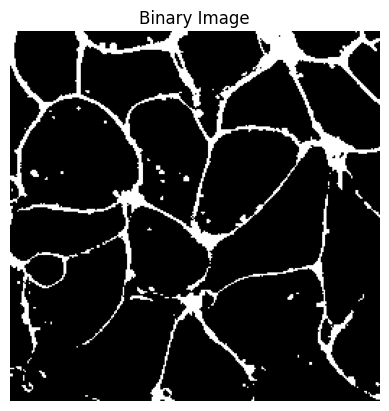

In [3]:
from skimage import filters

# Thresholding
binary = image_tophat > filters.threshold_otsu(image_tophat)

# Display the binary image
plt.imshow(binary, cmap='gray')
plt.title('Binary Image')
plt.axis('off')
plt.show()

## Step 4: Distance Transform
Compute the distance transform of the binary image and negate it.

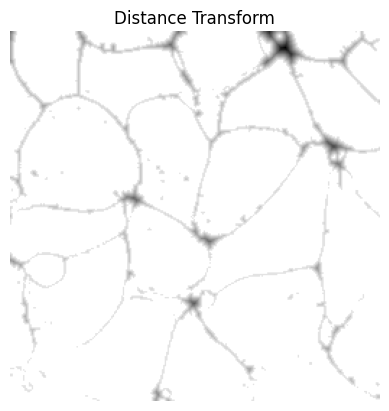

In [4]:
from scipy import ndimage as ndi

# Compute and negate the distance transform
distance = ndi.distance_transform_edt(binary)
distance = -distance

# Display the distance transform
plt.imshow(distance, cmap='gray')
plt.title('Distance Transform')
plt.axis('off')
plt.show()

## Step 5: Find Local Maxima
Identify the local maxima for marker-based watershed segmentation.

In [5]:
from skimage import feature

# Find local maxima
local_maxi = feature.peak_local_max(distance, indices=False, labels=binary)

# Create a binary image where local maxima are 1
markers, _ = ndi.label(local_maxi)

# Display the markers
plt.imshow(markers, cmap='nipy_spectral')
plt.title('Markers')
plt.axis('off')
plt.show()

TypeError: peak_local_max() got an unexpected keyword argument 'indices'

## Step 6: Apply Watershed Algorithm
Use the markers and negated distance transform to segment the cells.

In [ ]:
from skimage import segmentation

# Apply watershed algorithm
labels = segmentation.watershed(distance, markers, mask=binary)

# Display the segmented image
plt.imshow(labels, cmap='nipy_spectral')
plt.title('Watershed Segmentation')
plt.axis('off')
plt.show()

## Step 7: Measure Cell Areas
Calculate the area of each segmented cell and print the average cell area.

In [ ]:
from skimage import measure

# Measure the properties of the segmented regions
props = measure.regionprops(labels)
areas = [prop.area for prop in props]
average_area = np.mean(areas)

print(f"Average cell area: {average_area:.2f} pixels")